# Early Stopping

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

## Load Data

In [16]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

In [17]:
# save input and target variables
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [18]:
# normalize the target - this will make clearer training curves
targets = (targets - targets.mean(axis=0)) / targets.std()

In [19]:
# split into train and test
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

## Unregularized model

In [40]:
# Build the model

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model
        
unregularized_model = get_model()
# print(model.summary())
unregularized_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularized_model.fit(train_data, train_targets, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=True,
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
6/6 [==============================] - 0s 21ms/step - loss: 1.0101 - val_loss: 0.9142
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.8825 - val_loss: 0.7802
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6496 - val_loss: 0.7501
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5443 - val_loss: 0.7722
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5031 - val_loss: 0.7415
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5366 - val_loss: 0.6852
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5037 - val_loss: 0.6485
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4639 - val_loss: 0.6645
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4694 - val_loss: 0.6569
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4264 - val_loss: 0.6345
Epoch 11/100
6/6 [==========

In [41]:
unregularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5730 - 16ms/epoch - 8ms/step


0.5730115175247192

## Regularized model

In [42]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dense(1)
    ])
    return model

regularized_model = get_model()
# print(model.summary())
regularized_model.compile(optimizer='adam', loss='mse')
reg_history = regularized_model.fit(train_data, train_targets, epochs=100,
                                    validation_split=0.15, batch_size=64, verbose=True,
                                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])



Epoch 1/100
6/6 [==============================] - 0s 22ms/step - loss: 1.0106 - val_loss: 0.9180
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.8823 - val_loss: 0.7772
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6453 - val_loss: 0.7106
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5338 - val_loss: 0.8060
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5161 - val_loss: 0.6869
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4944 - val_loss: 0.6497
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.4678 - val_loss: 0.6272
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4407 - val_loss: 0.6200
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.4352 - val_loss: 0.6377
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 0.4295 - val_loss: 0.6500
Epoch 11/100
6/6 [======

In [43]:
regularized_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5603 - 16ms/epoch - 8ms/step


0.5602661371231079

### Plot the learning curves

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

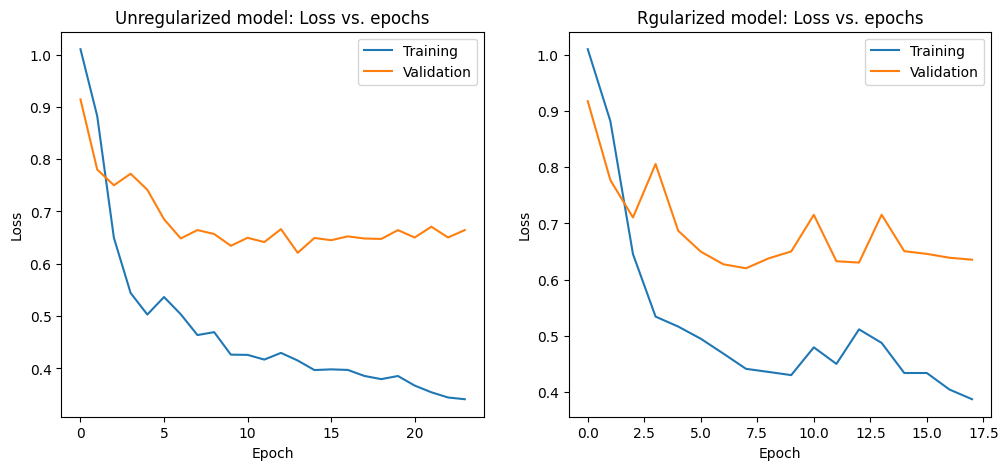

In [45]:
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularized model: Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Rgularized model: Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()
